<a href="https://colab.research.google.com/github/SmartNandini/Music_Genre/blob/main/Training/LSTM_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import keras
import matplotlib.pyplot as plt
import random
import librosa
import math

In [2]:
def load_data(data_path):

    with open(data_path, "r") as f:
        data = json.load(f)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    mapping = data["mapping"]

    print("Data succesfully loaded!")

    return  X, y, mapping
     

In [3]:
# path to json
DATA_PATH = "/content/drive/MyDrive/Music_Genre_Dataset/mfcc_data.json"
    
# load data
X, y, mapping = load_data(DATA_PATH)

Data succesfully loaded!


In [4]:
X.shape

(9986, 130, 13)

In [5]:
y.shape

(9986,)

In [6]:
mapping

['reggae',
 'disco',
 'jazz',
 '.ipynb_checkpoints',
 'rock',
 'classical',
 'hiphop',
 'blues',
 'pop',
 'country',
 'metal']

In [7]:
def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
    plt.show()
     

In [8]:
# create train, validation and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 10)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

# add an axis to input sets
X_train = X_train[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]
X_test = X_test[..., np.newaxis]
     

X_train.shape

(5991, 130, 13, 1)

In [14]:
input_shape = (X_train.shape[1], X_train.shape[2])
#input_shape_cnn = (X_train.shape[2], 1)
"""
# build the CNN
model_cnn = keras.Sequential()

# 1st conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu', use_bias = True, input_shape=input_shape_cnn))
model_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(1, 1), padding='same'))
#model_cnn.add(keras.layers.BatchNormalization())

# 2nd conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu', use_bias = True))
model_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(1, 1), padding='same'))
#model_cnn.add(keras.layers.BatchNormalization())

# 3rd conv layer
model_cnn.add(keras.layers.Conv2D(32, (2, 2), activation='relu', use_bias = True))
model_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
#model_cnn.add(keras.layers.BatchNormalization())



# flatten output and feed it into dense layer
model_cnn.add(keras.layers.Flatten())
"""

model = keras.Sequential()
#model.add(keras.layers.TimeDistributed(model_cnn, input_shape=input_shape))
model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences = True))
model.add(keras.layers.LSTM(64))
model.add(keras.layers.Dense(32, activation='relu'))
#model.add(keras.layers.Dropout(0.3))


# output layer
model.add(keras.layers.Dense(12, activation='softmax'))
     



# compile model
opt = keras.optimizers.Adam(learning_rate=0.001)
opt1 = keras.optimizers.RMSprop()
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
     

#model.build(input_shape)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 130, 64)           19968     
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 12)                396       
                                                                 
Total params: 55,468
Trainable params: 55,468
Non-trainable params: 0
_________________________________________________________________


In [15]:
# train model
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=50)

Epoch 1/50
188/188 [==============================] - 7s 16ms/step - loss: 1.7939 - accuracy: 0.3719 - val_loss: 1.5283 - val_accuracy: 0.4499
Epoch 2/50
188/188 [==============================] - 2s 12ms/step - loss: 1.3993 - accuracy: 0.4967 - val_loss: 1.3226 - val_accuracy: 0.5254
Epoch 3/50
188/188 [==============================] - 2s 12ms/step - loss: 1.2760 - accuracy: 0.5343 - val_loss: 1.3890 - val_accuracy: 0.5047
Epoch 4/50
188/188 [==============================] - 2s 12ms/step - loss: 1.2569 - accuracy: 0.5485 - val_loss: 1.2865 - val_accuracy: 0.5347
Epoch 5/50
188/188 [==============================] - 3s 16ms/step - loss: 1.1610 - accuracy: 0.5874 - val_loss: 1.1595 - val_accuracy: 0.5828
Epoch 6/50
188/188 [==============================] - 2s 13ms/step - loss: 1.0871 - accuracy: 0.6134 - val_loss: 1.1085 - val_accuracy: 0.5928
Epoch 7/50
188/188 [==============================] - 2s 12ms/step - loss: 1.0212 - accuracy: 0.6358 - val_loss: 1.0784 - val_accuracy: 0.6068

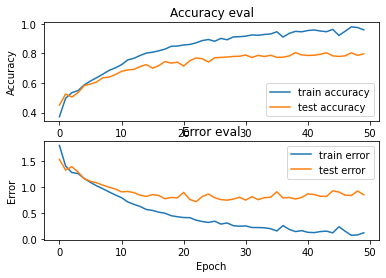

In [16]:
# plot accuracy and error as a function of the epochs
plot_history(history)

In [17]:
# evaluate model on Test Set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

79/79 - 1s - loss: 0.9285 - accuracy: 0.7857 - 529ms/epoch - 7ms/step

Test accuracy: 0.7857428789138794


In [19]:
model.save("/content/drive/MyDrive/Music_Genre_Dataset/Music_Genre_LSTM")

In [20]:
model.save("/content/drive/MyDrive/Music_Genre_Dataset/Music_Genre_LSTM.h5")